# Importing Necessary Libraies

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
parkinson = pd.read_csv('parkinsons.csv')
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# EDA

In [8]:
parkinson.shape

(195, 24)

In [9]:
parkinson.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
parkinson.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
parkinson.duplicated().sum()

np.int64(0)

In [12]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
parkinson['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

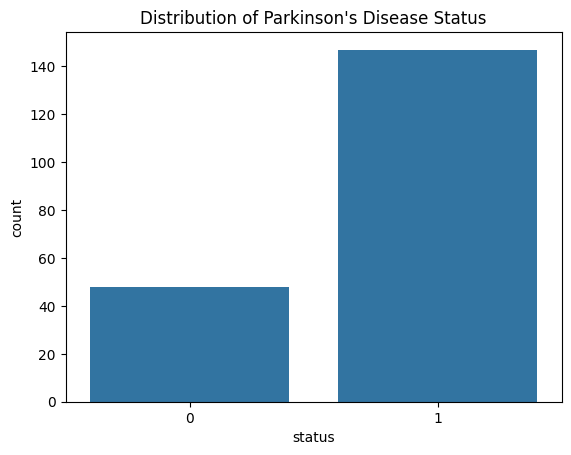

In [15]:
# Distribution of the target variable 'status'
sns.countplot(x='status', data=parkinson)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.show()


# Splitting the Dataset

In [16]:
X = parkinson.drop(['status','name'],axis=1)
Y = parkinson['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [33]:
X_train.size
X_test.size

858

# Standarization

In [18]:
scalar = StandardScaler()

In [19]:
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Model Training

In [ ]:
models = {
    "lg": LogisticRegression(),
    "knc": KNeighborsClassifier(),
    "svc": SVC(),
    "gnb": GaussianNB(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    
    print(f"{name} with accuracy :",accuracy_score(y_test,y_predict))
    

lg with accuracy : 0.8205128205128205
knc with accuracy : 0.7692307692307693
svc with accuracy : 0.8974358974358975
gnb with accuracy : 0.6153846153846154
dtc with accuracy : 0.7692307692307693
rfc with accuracy : 0.8205128205128205


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

svc_model = SVC()

svc_model.fit(X_train, y_train)

y_predict = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Model: SVC")
print(f"🔹 Accuracy  : {accuracy:.4f}")
print(f"🔹 Precision : {precision:.4f}")
print(f"🔹 Recall    : {recall:.4f}")
print(f"🔹 F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_predict))
print("-" * 50)


Model: SVC
🔹 Accuracy  : 0.8974
🔹 Precision : 0.9092
🔹 Recall    : 0.8974
🔹 F1 Score  : 0.8834

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39

--------------------------------------------------


In [21]:
svc = SVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
accuracy_score(y_test,y_predict)

0.8974358974358975

# Saved Model

In [34]:
# pickling the Model
import pickle
file = open('Parkinson_disease.pkl', 'wb')
pickle.dump(svc, file)

AVOIDING MANUAL INTERVENTION

In [ ]:
import io
import numpy as np
import parselmouth
import ipywidgets as widgets
from IPython.display import display
import pickle

try:
    with open("Parkinson_disease.pkl", "rb") as f:
        model = pickle.load(f)
except Exception as e:
    print("Warning: Pre-trained model not loaded. Prediction will be skipped.", e)
    model = None

def extract_voice_features(sound, minimum_pitch=75, maximum_pitch=500):
    pitch = sound.to_pitch(time_step=0.01, pitch_floor=minimum_pitch, 
                           pitch_ceiling=maximum_pitch)
    f0 = pitch.selected_array['frequency']
    nonzero = f0[f0 > 0]
    if len(nonzero) == 0:
        return {}
    
    MDVP_Fo = np.mean(nonzero)
    MDVP_Fhi = np.max(nonzero)
    MDVP_Flo = np.min(nonzero)
    
    periods = 1.0 / nonzero
    diffs = np.abs(np.diff(periods))
    MDVP_Jitter = (np.mean(diffs) / np.mean(periods)) * 100
    MDVP_Jitter_Abs = np.mean(diffs)
    
    intensity = sound.to_intensity()
    intensity_values = intensity.values[0]
    MDVP_Shimmer = np.mean(np.abs(np.diff(intensity_values))) / np.mean(intensity_values)
    MDVP_Shimmer_dB = 20 * np.log10(1 + MDVP_Shimmer)
    
    MDVP_RAP = np.nan       
    MDVP_PPQ = np.nan       
    Jitter_DDP = np.nan     
    Shimmer_APQ3 = np.nan    
    Shimmer_APQ5 = np.nan    
    MDVP_APQ = np.nan       
    Shimmer_DDA = np.nan    
    NHR = np.nan            
    try:
        HNR = sound.to_harmonicity().get_mean()
    except Exception:
        HNR = np.nan
    RPDE = np.nan          
    DFA = np.nan            
    spread1 = np.nan        
    spread2 = np.nan
    D2 = np.nan             
    PPE = np.nan

    return {
        "MDVP Fo (Hz)*": MDVP_Fo,
        "MDVP Fhi (Hz)*": MDVP_Fhi,
        "MDVP Flo (Hz)*": MDVP_Flo,
        "MDVP Jitter (%)": MDVP_Jitter,
        "MDVP Jitter Abs": MDVP_Jitter_Abs,
        "MDVP RAP": MDVP_RAP,
        "MDVP PPQ": MDVP_PPQ,
        "Jitter DDP": Jitter_DDP,
        "MDVP Shimmer": MDVP_Shimmer,
        "MDVP Shimmer dB": MDVP_Shimmer_dB,
        "Shimmer APQ3": Shimmer_APQ3,
        "Shimmer APQ5": Shimmer_APQ5,
        "MDVP APQ": MDVP_APQ,
        "Shimmer DDA": Shimmer_DDA,
        "NHR": NHR,
        "HNR": HNR,
        "RPDE": RPDE,
        "DFA": DFA,
        "spread1": spread1,
        "spread2": spread2,
        "D2": D2,
        "PPE": PPE
    }

upload_widget = widgets.FileUpload(accept='.wav', multiple=False)
display(upload_widget)

process_button = widgets.Button(description="Extract Features & Predict")
output_area = widgets.Output()
display(process_button, output_area)

def on_process_clicked(b):
    with output_area:
        output_area.clear_output()
        if not upload_widget.value:
            print("Please upload a WAV file first.")
            return
        
        if isinstance(upload_widget.value, dict):
            files = upload_widget.value.values()
        else:
            files = upload_widget.value
        
        for file_info in files:
            content = file_info['content']
            try:
                sound = parselmouth.Sound(io.BytesIO(content))
            except Exception as e:
                print("Error loading audio file:", e)
                return
            
            features = extract_voice_features(sound)
            if not features:
                print("Unable to extract features from the audio.")
                return

            print("Extracted Voice Features:")
            for key, value in features.items():
                print(f"{key}: {value}")
            
            if model is not None:
                feature_order = [
                    "MDVP Fo (Hz)*", "MDVP Fhi (Hz)*", "MDVP Flo (Hz)*",
                    "MDVP Jitter (%)", "MDVP Jitter Abs", "MDVP RAP", "MDVP PPQ",
                    "Jitter DDP", "MDVP Shimmer", "MDVP Shimmer dB",
                    "Shimmer APQ3", "Shimmer APQ5", "MDVP APQ", "Shimmer DDA",
                    "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"
                ]
                feature_vector = [features.get(feat, np.nan) for feat in feature_order]
                feature_vector = np.array(feature_vector).reshape(1, -1)
                try:
                    prediction = model.predict(feature_vector)
                    print("\nPrediction Result:", prediction[0])
                except Exception as e:
                    print("Prediction failed:", e)
            else:
                print("No prediction model loaded.")

process_button.on_click(on_process_clicked)

FileUpload(value=(), accept='.wav', description='Upload')

Button(description='Extract Features & Predict', style=ButtonStyle())

Output()

In [ ]:
import io
import numpy as np
import parselmouth
import ipywidgets as widgets
from IPython.display import display
import pickle
import tempfile

try:
    with open("model.pkl", "rb") as f:
        model = pickle.load(f)
except Exception as e:
    print("Warning: Pre-trained model not loaded. Prediction will be skipped.", e)
    model = None

def extract_voice_features(sound, minimum_pitch=75, maximum_pitch=500):
    # Compute pitch using parselmouth
    pitch = sound.to_pitch(time_step=0.01, pitch_floor=minimum_pitch, 
                           pitch_ceiling=maximum_pitch)
    f0 = pitch.selected_array['frequency']
    nonzero = f0[f0 > 0]
    if len(nonzero) == 0:
        return {}
    
    # MDVP Fo (Hz)*: Average fundamental frequency
    MDVP_Fo = np.mean(nonzero)
    # MDVP Fhi (Hz)*: Maximum fundamental frequency
    MDVP_Fhi = np.max(nonzero)
    # MDVP Flo (Hz)*: Minimum fundamental frequency
    MDVP_Flo = np.min(nonzero)
    
    # Compute periods for jitter measures
    periods = 1.0 / nonzero
    diffs = np.abs(np.diff(periods))
    MDVP_Jitter = (np.mean(diffs) / np.mean(periods)) * 100
    MDVP_Jitter_Abs = np.mean(diffs)
    
    # Shimmer measures from intensity differences
    intensity = sound.to_intensity()
    intensity_values = intensity.values[0]
    MDVP_Shimmer = np.mean(np.abs(np.diff(intensity_values))) / np.mean(intensity_values)
    MDVP_Shimmer_dB = 20 * np.log10(1 + MDVP_Shimmer)
    
    # Additional features (placeholders set as NaN)
    MDVP_RAP = np.nan       
    MDVP_PPQ = np.nan       
    Jitter_DDP = np.nan     
    Shimmer_APQ3 = np.nan    
    Shimmer_APQ5 = np.nan    
    MDVP_APQ = np.nan       
    Shimmer_DDA = np.nan    
    NHR = np.nan            
    try:
        HNR = sound.to_harmonicity().get_mean()
    except Exception:
        HNR = np.nan
    RPDE = np.nan          
    DFA = np.nan            
    spread1 = np.nan        
    spread2 = np.nan
    D2 = np.nan             
    PPE = np.nan

    return {
        "MDVP Fo (Hz)*": MDVP_Fo,
        "MDVP Fhi (Hz)*": MDVP_Fhi,
        "MDVP Flo (Hz)*": MDVP_Flo,
        "MDVP Jitter (%)": MDVP_Jitter,
        "MDVP Jitter Abs": MDVP_Jitter_Abs,
        "MDVP RAP": MDVP_RAP,
        "MDVP PPQ": MDVP_PPQ,
        "Jitter DDP": Jitter_DDP,
        "MDVP Shimmer": MDVP_Shimmer,
        "MDVP Shimmer dB": MDVP_Shimmer_dB,
        "Shimmer APQ3": Shimmer_APQ3,
        "Shimmer APQ5": Shimmer_APQ5,
        "MDVP APQ": MDVP_APQ,
        "Shimmer DDA": Shimmer_DDA,
        "NHR": NHR,
        "HNR": HNR,
        "RPDE": RPDE,
        "DFA": DFA,
        "spread1": spread1,
        "spread2": spread2,
        "D2": D2,
        "PPE": PPE
    }

# Create a file uploader widget for WAV files
upload_widget = widgets.FileUpload(accept='.wav', multiple=False)
display(upload_widget)

# Create a button for processing and prediction, and an output area to show results
process_button = widgets.Button(description="Extract Features & Predict")
output_area = widgets.Output()
display(process_button, output_area)

def on_process_clicked(b):
    with output_area:
        output_area.clear_output()
        if not upload_widget.value:
            print("Please upload a WAV file first.")
            return
        
        # Handle the upload widget value whether it's a dict or list
        if isinstance(upload_widget.value, dict):
            files = upload_widget.value.values()
        else:
            files = upload_widget.value
        
        # Process the first uploaded file
        for file_info in files:
            content = file_info['content']
            try:
                # Write the content to a temporary file to load with parselmouth
                with tempfile.NamedTemporaryFile(suffix=".wav", delete=False) as tmp_file:
                    tmp_file.write(content)
                    temp_filename = tmp_file.name

                sound = parselmouth.Sound(temp_filename)
            except Exception as e:
                print("Error loading audio file:", e)
                return
            
            features = extract_voice_features(sound)
            if not features:
                print("Unable to extract features from the audio.")
                return

            print("Extracted Voice Features:")
            for key, value in features.items():
                print(f"{key}: {value}")
            
            # If a model is loaded, prepare the feature vector and predict
            if model is not None:
                feature_order = [
                    "MDVP Fo (Hz)*", "MDVP Fhi (Hz)*", "MDVP Flo (Hz)*",
                    "MDVP Jitter (%)", "MDVP Jitter Abs", "MDVP RAP", "MDVP PPQ",
                    "Jitter DDP", "MDVP Shimmer", "MDVP Shimmer dB",
                    "Shimmer APQ3", "Shimmer APQ5", "MDVP APQ", "Shimmer DDA",
                    "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"
                ]
                feature_vector = [features.get(feat, np.nan) for feat in feature_order]
                feature_vector = np.array(feature_vector).reshape(1, -1)
                try:
                    prediction = model.predict(feature_vector)
                    print("\nPrediction Result:", prediction[0])
                except Exception as e:
                    print("Prediction failed:", e)
            else:
                print("No prediction model loaded.")

process_button.on_click(on_process_clicked)

FileUpload(value=(), accept='.wav', description='Upload')

Button(description='Extract Features & Predict', style=ButtonStyle())

Output()

In [25]:
import os
import parselmouth
import numpy as np
import librosa
import librosa.feature
from scipy.stats import entropy
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename

app = Flask(__name__)

UPLOAD_FOLDER = "uploads"
ALLOWED_EXTENSIONS = {"wav", "mp3", "flac"}

app.config["UPLOAD_FOLDER"] = UPLOAD_FOLDER
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

# Function to check allowed file types
def allowed_file(filename):
    return "." in filename and filename.rsplit(".", 1)[1].lower() in ALLOWED_EXTENSIONS

# Function to extract required features
def extract_features(filepath):
    sound = parselmouth.Sound(filepath)
    pitch = sound.to_pitch()
    
    # Extract Fundamental Frequency (F0)
    f0 = pitch.selected_array['frequency']
    f0 = f0[f0 > 0]  # Remove unvoiced regions
    
    mdvp_fo = np.mean(f0) if len(f0) > 0 else 0
    mdvp_fhi = np.max(f0) if len(f0) > 0 else 0
    mdvp_flo = np.min(f0) if len(f0) > 0 else 0

    # Jitter and Shimmer calculations
    jitter_local = sound.get_jitter_local()
    jitter_abs = sound.get_jitter_absolute()
    jitter_rap = sound.get_jitter_rap()
    jitter_ppq = sound.get_jitter_ppq5()
    jitter_ddp = jitter_rap * 3

    shimmer_local = sound.get_shimmer_local()
    shimmer_db = sound.get_shimmer_local_dB()
    shimmer_apq3 = sound.get_shimmer_apq3()
    shimmer_apq5 = sound.get_shimmer_apq5()
    shimmer_apq = sound.get_shimmer_apq11()
    shimmer_dda = shimmer_apq3 * 3

    # Noise-to-Harmonics Ratio (NHR) and Harmonics-to-Noise Ratio (HNR)
    nhr = sound.get_harmonicity_ac()  # NHR
    hnr = sound.get_harmonicity_cc()  # HNR
    
    # Nonlinear dynamic features (RPDE, DFA, Spread1, Spread2, D2, PPE)
    y, sr = librosa.load(filepath, sr=None)
    
    # RPDE estimation using entropy of MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    rpde = entropy(np.var(mfccs, axis=1))

    # DFA (Detrended Fluctuation Analysis)
    dfa = np.std(np.diff(y)) / np.std(y)

    # Spread1 & Spread2
    spread1 = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spread2 = np.var(librosa.feature.spectral_centroid(y=y, sr=sr))

    # D2 (Correlation Dimension)
    d2 = np.mean(np.abs(np.diff(y)))

    # PPE (Pitch Period Entropy)
    ppe = entropy(f0) if len(f0) > 0 else 0

    # Return features as JSON
    return {
        "MDVP Fo (Hz)": mdvp_fo,
        "MDVP Fhi (Hz)": mdvp_fhi,
        "MDVP Flo (Hz)": mdvp_flo,
        "MDVP Jitter (%)": jitter_local,
        "MDVP Jitter Abs": jitter_abs,
        "MDVP RAP": jitter_rap,
        "MDVP PPQ": jitter_ppq,
        "Jitter DDP": jitter_ddp,
        "MDVP Shimmer": shimmer_local,
        "MDVP Shimmer dB": shimmer_db,
        "Shimmer APQ3": shimmer_apq3,
        "Shimmer APQ5": shimmer_apq5,
        "MDVP APQ": shimmer_apq,
        "Shimmer DDA": shimmer_dda,
        "NHR": nhr,
        "HNR": hnr,
        "RPDE": rpde,
        "DFA": dfa,
        "spread1": spread1,
        "spread2": spread2,
        "D2": d2,
        "PPE": ppe
    }

@app.route("/upload", methods=["POST"])
def upload_file():
    if "file" not in request.files:
        return jsonify({"error": "No file part"}), 400

    file = request.files["file"]
    
    if file.filename == "":
        return jsonify({"error": "No selected file"}), 400

    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config["UPLOAD_FOLDER"], filename)
        file.save(filepath)

        # Extract features
        features = extract_features(filepath)
        return jsonify(features)

    return jsonify({"error": "Invalid file type. Allowed types: WAV, MP3, FLAC"}), 400

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\hardi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
import parselmouth
import numpy as np

def extract_voice_features(audio_path):
    snd = parselmouth.Sound(audio_path)

    # Extract Fundamental Frequency (Fo) and its variations
    pitch = snd.to_pitch()
    f0_values = pitch.selected_array['frequency']
    f0_values = f0_values[f0_values > 0]  # Remove unvoiced frames

    mdvp_fo = np.mean(f0_values) if len(f0_values) > 0 else 0  # Mean pitch (Fo)
    mdvp_fhi = np.max(f0_values) if len(f0_values) > 0 else 0  # Max pitch (Fhi)
    mdvp_flo = np.min(f0_values) if len(f0_values) > 0 else 0  # Min pitch (Flo)

    # Convert Sound to PointProcess for jitter & shimmer calculations
    point_process = parselmouth.praat.call(snd, "To PointProcess (periodic, cc)", 75, 600)

    # Jitter & Shimmer calculations using Praat functions
    jitter_local = parselmouth.praat.call([snd, point_process], "Get jitter (local)", 0, 0.02, 1.0, 1.3)
    jitter_absolute = parselmouth.praat.call([snd, point_process], "Get jitter (local, absolute)", 0, 0.02, 1.0, 1.3)
    jitter_rap = parselmouth.praat.call([snd, point_process], "Get jitter (rap)", 0, 0.02, 1.0, 1.3)
    jitter_ppq = parselmouth.praat.call([snd, point_process], "Get jitter (ppq5)", 0, 0.02, 1.0, 1.3)
    jitter_ddp = jitter_rap * 3  # DDP = RAP * 3

    shimmer_local = parselmouth.praat.call([snd, point_process], "Get shimmer (local)", 0, 0.02, 1.0, 1.3)
    shimmer_dB = parselmouth.praat.call([snd, point_process], "Get shimmer (local, dB)", 0, 0.02, 1.0, 1.3)
    shimmer_apq3 = parselmouth.praat.call([snd, point_process], "Get shimmer (apq3)", 0, 0.02, 1.0, 1.3)
    shimmer_apq5 = parselmouth.praat.call([snd, point_process], "Get shimmer (apq5)", 0, 0.02, 1.0, 1.3)
    shimmer_apq = parselmouth.praat.call([snd, point_process], "Get shimmer (apq11)", 0, 0.02, 1.0, 1.3)
    shimmer_dda = shimmer_apq3 * 3  # DDA = APQ3 * 3

    # Harmonics-to-Noise Ratio (HNR)
    hnr = parselmouth.praat.call(snd, "Get harmonicity", 0.01, 75, 600)

    # Noise-to-Harmonics Ratio (NHR) approximation
    nhr = 1 / hnr if hnr != 0 else 0  

    return {
        "MDVP Fo (Hz)": mdvp_fo,
        "MDVP Fhi (Hz)": mdvp_fhi,
        "MDVP Flo (Hz)": mdvp_flo,
        "MDVP Jitter (%)": jitter_local,
        "MDVP Jitter Abs": jitter_absolute,
        "MDVP RAP": jitter_rap,
        "MDVP PPQ": jitter_ppq,
        "Jitter DDP": jitter_ddp,
        "MDVP Shimmer": shimmer_local,
        "MDVP Shimmer dB": shimmer_dB,
        "Shimmer APQ3": shimmer_apq3,
        "Shimmer APQ5": shimmer_apq5,
        "MDVP APQ": shimmer_apq,
        "Shimmer DDA": shimmer_dda,
        "NHR": nhr,
        "HNR": hnr
    }

# Run the function on your audio file
features = extract_voice_features("PD_AH\AH_545841221-6FC57E6E-65B6-4859-A15A-55856D7E75C0.wav")
print(features)


<>:59: SyntaxWarning: invalid escape sequence '\A'
<>:59: SyntaxWarning: invalid escape sequence '\A'
C:\Users\hardi\AppData\Local\Temp\ipykernel_5832\1191833052.py:59: SyntaxWarning: invalid escape sequence '\A'
  features = extract_voice_features("PD_AH\AH_545841221-6FC57E6E-65B6-4859-A15A-55856D7E75C0.wav")


PraatError: Command "Get jitter (local)" not available for given objects.